# PRÁCTICA 1: REGRESIÓN LINEAL CON UNA VARIABLE Y VARIAS 
ALUMNOS: GONZALO GUZMÁN DEL RÍO Y ALEJANDRO ORTEGA ÁLVAREZ

En esta práctica nos centraremos en la regresión lineal con una y varias variables.

# Imports

In [1]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def carga_csv(file_name):
    valoresX = read_csv(file_name, header = None).values
    
    return valoresX.astype(float)

(97,)
1
(97, 1)
<class 'numpy.ndarray'>


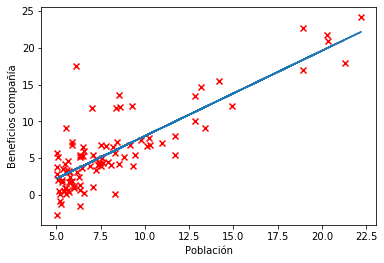

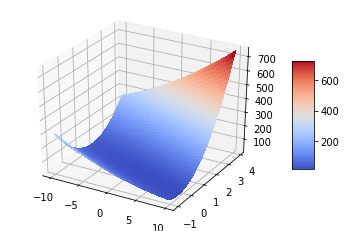

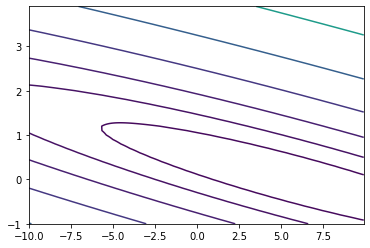

In [74]:
values0 = carga_csv('ex1data1.csv')
X = values0[:, :-1]
Y = values0[:, -1]
print(Y.shape)
plt.scatter(X, Y, marker = 'x', c = 'r')
   
plt.xlabel('Población')
plt.ylabel('Beneficios compañía')

m = np.shape(X)[0]
n = np.shape(X)[1]
print(n)

Y = np.reshape(Y, (m, 1))
print(Y.shape)

alpha = 0.01

def h(x, theta):
    return np.dot(x, np.transpose(theta))

def coste(x, y, theta):
    H = h(x, theta)
    Aux = (H-y)**2
    return (Aux.sum()/(2*len(x)))

def descenso_gradiente(x, y, times):
    theta = np.zeros([1, n+1], dtype=float) #1 fila, 2 columnas
    cost = np.zeros([times, 1], dtype = float)
    for i in range(times):
        H = h(x, theta)
        temp0 = theta[0][0] - alpha*(1/m)* np.sum((H-y))
        temp1 =theta[0][1] - alpha*(1/m)* np.sum((H-y)*x)
        theta[0][0] = temp0
        theta[0][1] = temp1
        cost[i] = coste(x, y, theta)
    return [theta, cost]

def make_data(t0_range, t1_range, X, Y):
    """Genera las matrices X,Y,Z para generar un plot en 3D
    """
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    # Theta0 y Theta1 tienen las misma dimensiones, de forma que
    # cogiendo un elemento de cada uno se generan las coordenadas x,y
    # de todos los puntos de la rejilla
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])/100
    return [Theta0, Theta1, Coste]
        
    
X = np.hstack([np.ones([m, 1]), X])
thSol = descenso_gradiente(X, Y, 1500)[0]
costSol = descenso_gradiente(X, Y, 1500)[1]
print(type(costSol))

plt.plot(X[:, 1:], h(X, thSol))
XM, YM, ZM = make_data([-10,10],[-1,4], X,Y)

def figura_3d(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d') # ax = Axes3D(fig)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)  

    fig.colorbar(surf, shrink =0.5, aspect=5)
    plt.show()
    
def contour(X, Y, Z):
    plt.figure()
    plt.contour(X, Y, Z, np.logspace(-2, 3, 20))
    plt.show()
     
    
figura_3d(XM, YM, ZM)
contour(XM, YM, ZM)

2
(47, 1)
<class 'numpy.ndarray'>
(1500, 1)


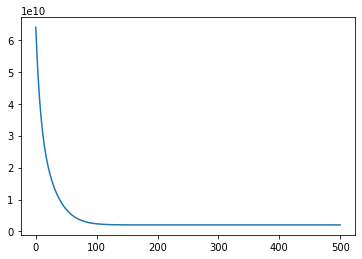

In [75]:
values = carga_csv('ex1data2.csv')
X = values[:, :-1]
Y = values[:, -1]
m = np.shape(X)[0]
n = np.shape(X)[1]
print(n)

Y = np.reshape(Y, (m, 1))
print(Y.shape)
X = np.hstack([np.ones([m, 1]), X])

def normalize(matrix):
    X_to_norm = np.empty(matrix.shape)
    mu = np.empty(n+1) #2 columnas para la media de cada atributo
    sigma = np.empty(n+1) #2 columnas para la desviación típica de cada atributo
    for i in range(n+1): #Recorremos ambas columnas
        mu[i] = np.mean(matrix[:, i])
        sigma[i] = np.std(matrix[:, i])
        if sigma[i] != 0:
            aux = (X[:, i] - mu[i])/sigma[i]
        else:
            aux = 1
        X_to_norm[:, i] = aux
    
    return X_to_norm, mu, sigma
        
a, b, c = normalize(X)
thSol, costSol = descenso_gradiente(a, Y, 1500)
print(type(costSol))

def evolucion_coste(costeArr, times):
    plt.figure()
    x = np.linspace(0, 500, times, endpoint = True)
    x = np.reshape(x, (times, 1))
    print(costSol.shape)
    plt.plot(x, costSol)
evolucion_coste(costSol, 1500)

Leemos el csv a tratar para la primera parte de la práctica:

Para el cálculo de h----> Htheta(x) = theta0 + x.theta1
def h(x, theta)
el objetivo es encontrar el mínimo arbitrario avanzando los valores de theta
theta[0,0]

Htheta(x) = theta^T(traspuesta) * x

[1x][0]
    [0]
    
    
Resumen d elo que hay que hacer:
T = theta
T0 = 0
T1 = 0
repeat 1500{
    T0 = T0 + alpha*1/m E desde i = 1 hasta m(hT(x^i) - y^i)
    T1 = T1 + alpha*1/m E desde i = 1 hasta m(hT(x^i) - y^i)*X^(i)
}

m = filas del csv

calculo de j es el coste. Nos dice si vamos bien, si el valor va disminuyendo